In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


     -------------------------------------- 455.9/455.9 MB 9.1 MB/s eta 0:00:00
     --------------------------------------- 35.6/35.6 MB 46.9 MB/s eta 0:00:00


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.2.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
Babel                        2.10.3
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.6.15.1
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.0.0
fastjsonschema               2.16.1
flatbuffers                  2.0.7
fonttools                    4.37.1
gast                         0.4.0

In [3]:
import tensorflow as tf
import os 

In [4]:
os.path.join('data', 'happy')

'data\\happy'

In [5]:
os.listdir('data')

['depressed', 'happy']

### Check GPU

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
gpus

[]

### Remove bad images

In [8]:
import cv2
import imghdr

In [10]:
imghdr

<module 'imghdr' from 'c:\\users\\coren\\python\\py3810\\lib\\imghdr.py'>

In [11]:
data_dir ='data'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [13]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\depressed\17010678-3d-personnes-homme-personne-douleur-inquiets-sad-concept-de-stress-dC3A9pression-.jpg
Image not in ext list data\depressed\1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg
Image not in ext list data\depressed\192px.svg
Image not in ext list data\depressed\1pLEbAvEmmI9HPgRFQPlxKA.jpeg
Image not in ext list data\depressed\58b5f67f27000020007d723c.jpeg
Image not in ext list data\depressed\5d0202a42400009d178b65e1.jpeg
Image not in ext list data\depressed\close-pensive-sad-young-indian-260nw-1924895555.jpg
Image not in ext list data\depressed\depressed-man-sitting-head-handsdramatic-260nw-636375866.jpg
Image not in ext list data\depressed\depressed-with-psoriasis-not-alone-1440x810.jpg
Image not in ext list data\depressed\dpressed.jpg
Image not in ext list data\depressed\Habits-of-People-With-Concealed-Depression-3.jpg
Image not in ext list data\depressed\silhouette-depressed-man-sitting-on-260nw-1502365082.jpg
Image not 

In [15]:
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread(os.path.join('data','happy','227-2271622_happy-people-business-team-celebrating-png.png'))

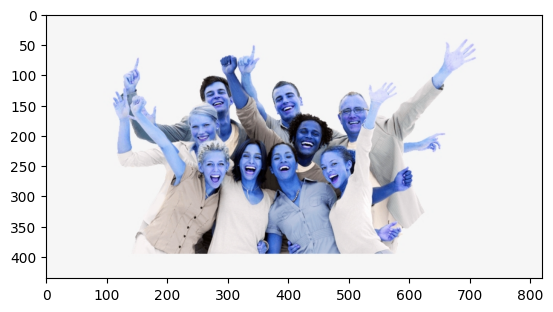

In [19]:
plt.imshow(img)

#### we change the parameters of the image to plot it in RGB instead of BGR 

In [22]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

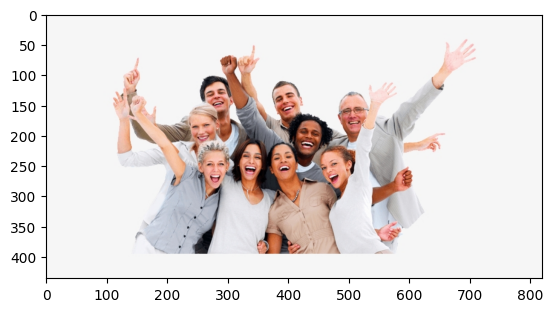

In [23]:
plt.imshow(RGB_img)

### LOAD DATA


In [24]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [25]:
import numpy as np

In [26]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 269 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator()

In [28]:
data_iterator

In [29]:
batch = data_iterator.next()

In [30]:
batch

(array([[[[ 67.       ,  75.       ,  96.       ],
          [ 67.19922  ,  75.09961  ,  95.90039  ],
          [ 69.49805  ,  76.49805  ,  95.49805  ],
          ...,
          [103.328125 , 113.99609  , 119.83008  ],
          [ 97.49805  , 108.49805  , 114.49805  ],
          [ 86.365234 ,  94.46484  , 105.29883  ]],
 
         [[ 67.       ,  75.       ,  96.       ],
          [ 67.19922  ,  75.09961  ,  95.90039  ],
          [ 69.49805  ,  76.49805  ,  95.49805  ],
          ...,
          [103.42508  , 114.09305  , 119.92703  ],
          [ 98.023865 , 109.023865 , 115.023865 ],
          [ 86.94922  ,  95.04883  , 105.88281  ]],
 
         [[ 67.30664  ,  75.30664  ,  95.69336  ],
          [ 67.50586  ,  75.40625  ,  95.65484  ],
          [ 69.80469  ,  76.80469  ,  95.80469  ],
          ...,
          [104.05652  , 114.72449  , 120.55847  ],
          [ 99.01172  , 110.01172  , 116.01172  ],
          [ 87.978516 ,  96.078125 , 106.91211  ]],
 
         ...,
 
         [[ 

In [31]:
len(batch)

2

In [32]:
batch[0]

array([[[[ 67.       ,  75.       ,  96.       ],
         [ 67.19922  ,  75.09961  ,  95.90039  ],
         [ 69.49805  ,  76.49805  ,  95.49805  ],
         ...,
         [103.328125 , 113.99609  , 119.83008  ],
         [ 97.49805  , 108.49805  , 114.49805  ],
         [ 86.365234 ,  94.46484  , 105.29883  ]],

        [[ 67.       ,  75.       ,  96.       ],
         [ 67.19922  ,  75.09961  ,  95.90039  ],
         [ 69.49805  ,  76.49805  ,  95.49805  ],
         ...,
         [103.42508  , 114.09305  , 119.92703  ],
         [ 98.023865 , 109.023865 , 115.023865 ],
         [ 86.94922  ,  95.04883  , 105.88281  ]],

        [[ 67.30664  ,  75.30664  ,  95.69336  ],
         [ 67.50586  ,  75.40625  ,  95.65484  ],
         [ 69.80469  ,  76.80469  ,  95.80469  ],
         ...,
         [104.05652  , 114.72449  , 120.55847  ],
         [ 99.01172  , 110.01172  , 116.01172  ],
         [ 87.978516 ,  96.078125 , 106.91211  ]],

        ...,

        [[ 20.010181 ,  37.01018  ,  6

In [36]:
batch[1]
#0 = depressed
#1 = happy

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [34]:
len(batch)

2

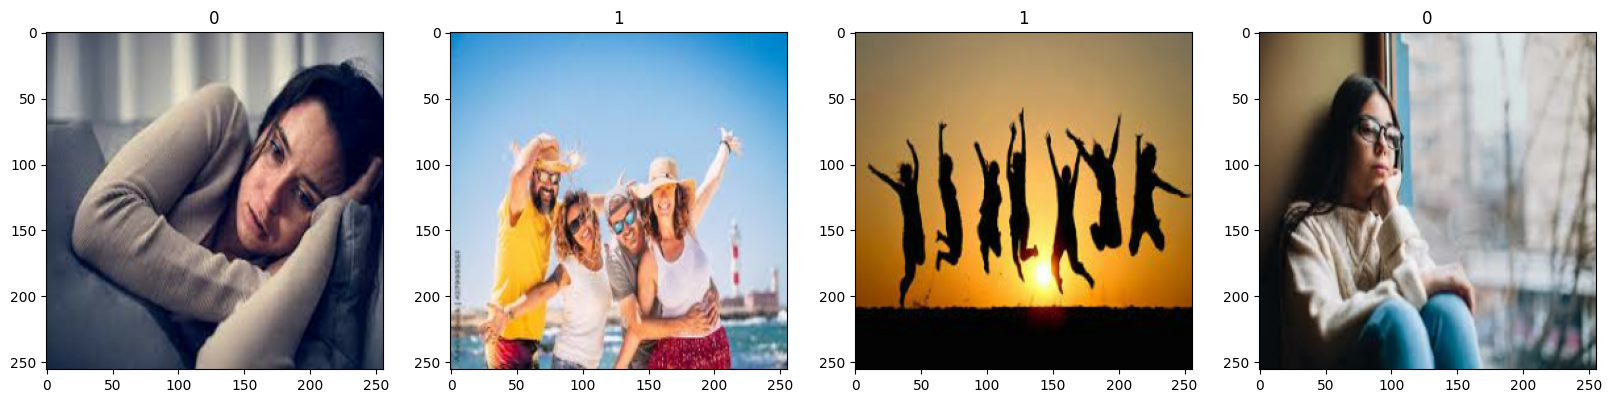

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### PROCESS DATA


In [38]:
scaled = batch[0]/255

In [40]:
scaled.max()

1.0

### Scale Data

In [41]:
data = data.map(lambda x,y: (x/255,y))

In [42]:
scaled_iterator = data.as_numpy_iterator()

In [43]:
batch = scaled_iterator.next()

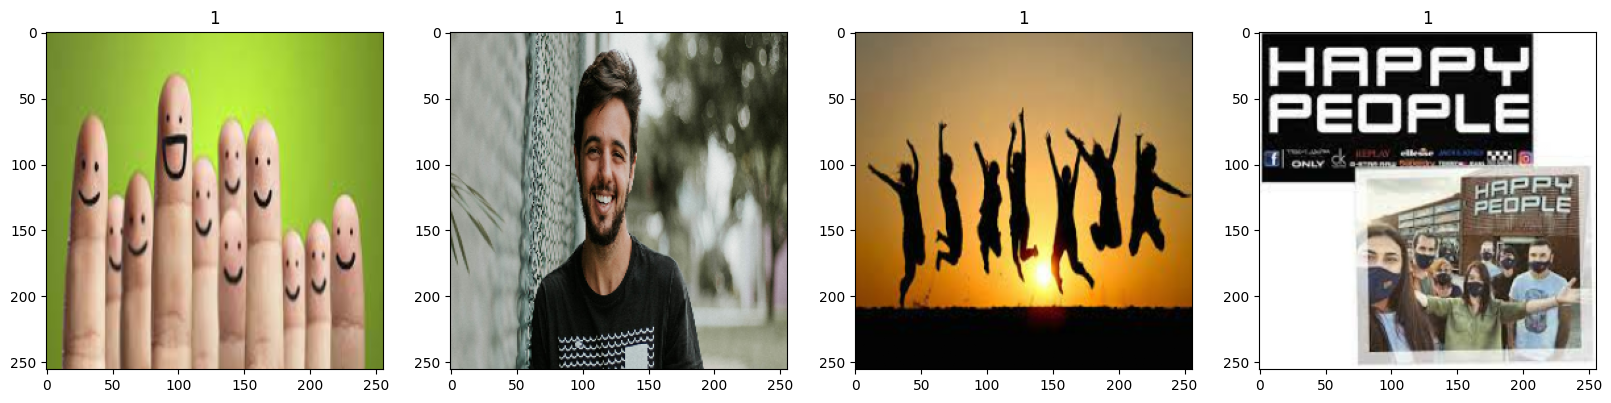

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [45]:
batch[0].max()

1.0

### Split data

In [46]:
len(data)

9

In [47]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [49]:
print(train_size)
print(val_size)
print(test_size)

6
1
1


In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [51]:
train_size+val_size+test_size

9

In [52]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [53]:
len(train)

6

### BUILD THE NEURAL NETWORK

#### Build deep learning model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
model = Sequential()

In [57]:
model

In [58]:
model.add(Conv2D(16, (3,3) , 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics='accuracy')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [62]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 6s 873ms/step - loss: 0.8600 - accuracy: 0.5521 - val_loss: 0.6586 - val_accuracy: 0.5469
Epoch 2/20
6/6 [==============================] - 6s 840ms/step - loss: 0.6640 - accuracy: 0.4740 - val_loss: 0.6039 - val_accuracy: 0.7031
Epoch 3/20
6/6 [==============================] - 6s 843ms/step - loss: 0.5908 - accuracy: 0.7083 - val_loss: 0.5386 - val_accuracy: 0.7812
Epoch 4/20
6/6 [==============================] - 6s 840ms/step - loss: 0.5187 - accuracy: 0.7708 - val_loss: 0.4644 - val_accuracy: 0.7188
Epoch 5/20
6/6 [==============================] - 6s 831ms/step - loss: 0.3582 - accuracy: 0.8698 - val_loss: 0.2865 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 6s 833ms/step - loss: 0.3089 - accuracy: 0.8854 - val_loss: 0.2317 - val_accuracy: 0.9219
Epoch 7/20
6/6 [==============================] - 6s 844ms/step - loss: 0.1792 - accuracy: 0.9531 - val_loss: 0.2795 - val_accuracy: 0.9062
Epoch 8/20
6/6 [====

In [67]:
hist.history

{'loss': [0.859980046749115,
  0.6640026569366455,
  0.5908355116844177,
  0.5187360644340515,
  0.35822001099586487,
  0.3088740408420563,
  0.17918582260608673,
  0.18525592982769012,
  0.09867297857999802,
  0.05668945237994194,
  0.026799796149134636,
  0.03337065875530243,
  0.017000576481223106,
  0.019360357895493507,
  0.015419818460941315,
  0.011538253165781498,
  0.01189799141138792,
  0.010746913962066174,
  0.003976224455982447,
  0.035385146737098694],
 'accuracy': [0.5520833134651184,
  0.4739583432674408,
  0.7083333134651184,
  0.7708333134651184,
  0.8697916865348816,
  0.8854166865348816,
  0.953125,
  0.9322916865348816,
  0.96875,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  1.0,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  1.0,
  0.9947916865348816],
 'val_loss': [0.6586284637451172,
  0.603912889957428,
  0.5385652780532837,
  0.46440553665161133,
  0.28647270798683167,
  0.231675565242767

#### Plot performance

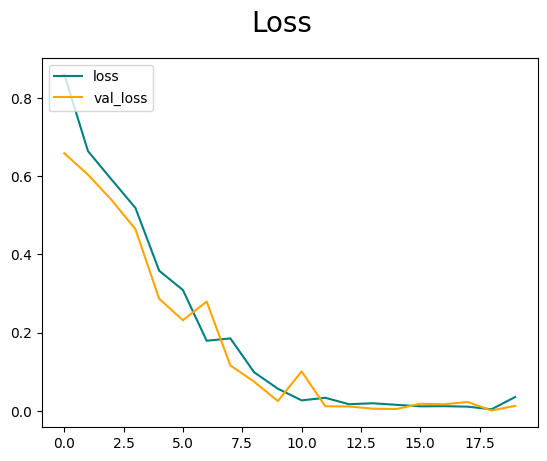

In [68]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

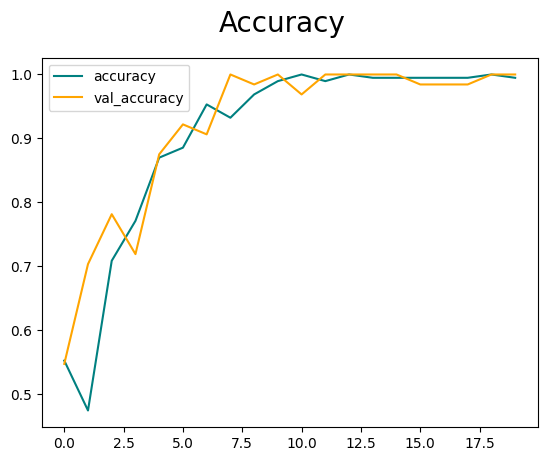

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### EVALUATE PERFORMANCE


In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
len(test)

1

In [73]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 156ms/step


In [74]:
print(f'Precision = {pre.result().numpy()}, Recall = {re.result().numpy()}, Accuracy = {acc.result().numpy()}')

Precision = 1.0, Recall = 1.0, Accuracy = 1.0


#### 1 - For a happy person  

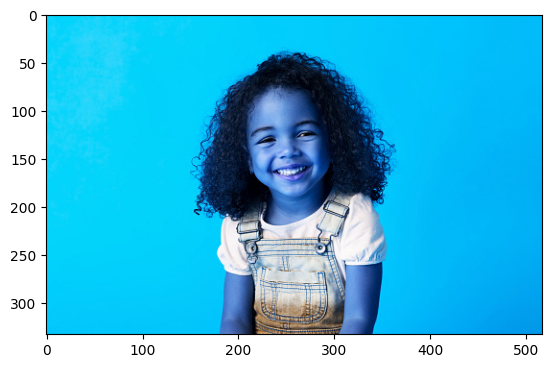

In [88]:
img = cv2.imread(os.path.join('data','happyTest','test.jpg'))
plt.imshow(img)
plt.show()

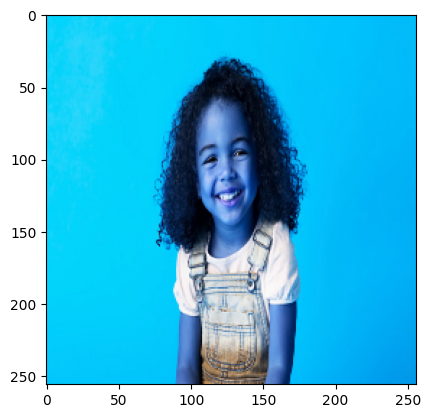

In [89]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 56ms/step


In [91]:
yhat

array([[0.99999976]], dtype=float32)

In [92]:
if yhat < 0.5: 
    print(f'Predicted class is depressed')
else:
    print(f'Predicted class is happy')

Predicted class is happy


#### 2 - For a depressed person  

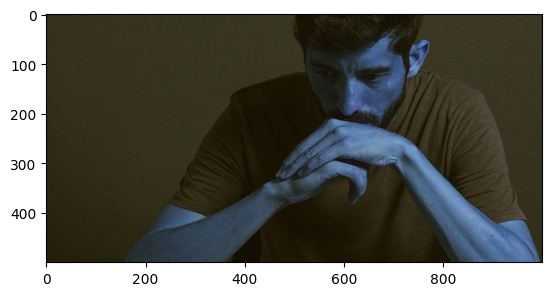

In [93]:
img = cv2.imread(os.path.join('data','depressedTest','test.jpeg'))
plt.imshow(img)
plt.show()

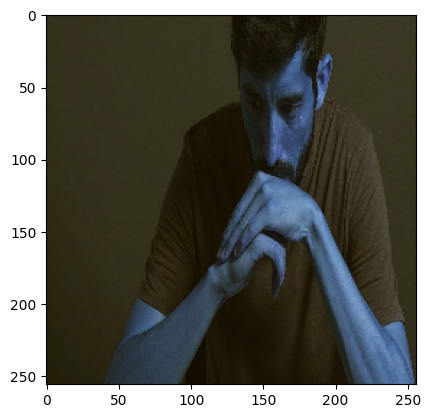

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 35ms/step


In [97]:
yhat

array([[0.00532825]], dtype=float32)

In [98]:
if yhat < 0.5: 
    print(f'Predicted class is depressed')
else:
    print(f'Predicted class is happy')

Predicted class is depressed


### Save the model 

In [99]:
from tensorflow.keras.models import load_model

In [101]:
model.save(os.path.join('models','depressionDetection.h5'))